In [107]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
from sklearn import datasets, linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 


def VIF(df, columns): 
    values=sm.add_constant(df[columns]).values
    # the dataframe passed to VIF␣ ↪ must include the intercept term. We add it the same way we did before. 
    num_columns=len(columns)+1#we added intercept 
    vif=[variance_inflation_factor(values, i) for i in range(num_columns)] 
    return pd.Series(vif[1:], index=columns)
def OSR2(model, y_train, x_test,y_test):
    y_pred=model.predict(x_test) 
    SSE=np.sum((y_test-y_pred)**2) 
    SST=np.sum((y_test-np.mean(y_train))**2) 
    return 1-(SSE/SST)

In [108]:
training_data = pd.read_csv('../features_train.csv')
training_data.drop(columns=['Unnamed: 0'], inplace=True)
training_data = training_data.drop(0)
training_data['Previous Sentiment'] = training_data['Sentiment'].shift(1)
training_data = training_data[1:]

testing_data = pd.read_csv('../features_test.csv')
testing_data.drop(columns=['Unnamed: 0'], inplace=True)
testing_data['Previous Sentiment'] = testing_data['Sentiment'].shift(1)
print(testing_data)
testing_data = testing_data[1:]
X_train = training_data.drop(columns=['Tesla Stock Close Price'])
y_train = training_data['Tesla Stock Close Price']
X_test = testing_data.drop(columns=['Tesla Stock Close Price'])
y_test = testing_data['Tesla Stock Close Price']
#use only the important features
features =X_train.columns
X_train.head()




    Tesla Stock Close Price  Tesla Stock Open Price  Tesla Stock Volume  \
0                 33.525466               33.204667         384174000.0   
1                 35.679167               35.058333         317018625.0   
2                 38.820533               38.522933         259672200.0   
3                 51.983867               50.805066         640115700.0   
4                 52.226400               51.676267         271176600.0   
..                      ...                     ...                 ...   
59               234.918665              234.831335          91410360.0   
60               224.356668              227.357336          77962860.0   
61               199.837335              203.438669         113565420.0   
62               194.362003              191.550668         100691280.0   
63               208.355555              206.255559          77746900.0   

    Tesla Stock Adj Close Price  Tesla Stock High  Tesla Stock Low  \
0                     33.5254

,Tesla Stock Open Price,Tesla Stock Volume,Tesla Stock Adj Close Price,Tesla Stock High,Tesla Stock Low,S&P 500 Variance,Ford Stock Price,GM Stock Price,Toyota Stock Price,Nissan Stock Price,Tesla Wikipedia Page Views,Sentiment,Previous Sentiment,Previous Week Tesla Stock Close Price
2,1.401200,13199100.0,1.388933,1.424133,1.354267,435.732436,13.0400,34.189999,72.763998,15.460,1102.2,0.140323,0.089603,1.384800
3,1.256267,12649800.0,1.232667,1.264800,1.215600,380.825787,12.5600,34.189999,70.756001,15.062,898.0,0.040080,0.140323,1.388933
4,1.255867,7230300.0,1.261200,1.282000,1.233067,316.106150,12.0020,34.189999,70.690001,15.200,801.0,0.188023,0.040080,1.232667
5,1.303333,8167800.0,1.312267,1.333600,1.282933,591.345328,11.3280,34.189999,69.030000,14.992,766.2,0.168206,0.188023,1.261200
6,1.357833,6225000.0,1.385000,1.403833,1.351167,615.993610,11.7975,34.189999,69.000000,15.745,808.5,0.119400,0.168206,1.312267


In [109]:
#Now we want to see how the model behaves. We train the linear regression.
#We will mostly focus on the p-values, the VIF values, and R2.
X=X_train
Y=y_train
X2 = sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, features))

pd.set_option('display.max_colwidth', None) 



                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 4.736e+19
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:35   Log-Likelihood:                 7545.8
No. Observations:                      431   AIC:                        -1.506e+04
Df Residuals:                          416   BIC:                        -1.500e+04
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [110]:
#We see that the p-values are very high for some features, we should eliminate them.
#We eliminate Tesla's Financial Features which are very correlated with the Close Price we are trying to predict, since it has a very high p-value as well as a high VIF value.
X_train = X_train.drop(columns=['Tesla Stock Open Price','Tesla Stock Adj Close Price','Tesla Stock High', 'Tesla Stock Low'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))



                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     3759.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:35   Log-Likelihood:                -515.49
No. Observations:                      431   AIC:                             1053.
Df Residuals:                          420   BIC:                             1098.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [111]:
#Now we eliminate Nissan stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['Nissan Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))


                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     4187.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:35   Log-Likelihood:                -515.49
No. Observations:                      431   AIC:                             1051.
Df Residuals:                          421   BIC:                             1092.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [112]:
#Now we eliminate  SP500 Variance , since it has a very high p-value
X_train = X_train.drop(columns=['S&P 500 Variance'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     4721.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:35   Log-Likelihood:                -515.51
No. Observations:                      431   AIC:                             1049.
Df Residuals:                          422   BIC:                             1086.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Tesla Stock Volume                       1.945036
Ford Stock Price                         1.658710
GM Stock Price                           2.778089
Toyota Stock Price                       4.585023
Tesla Wikipedia Page Views               2.550467
Sentiment                                1.398512
Previous Sentiment                       1.399460
Previous Week Tesla Stock Close Price    4.567839
dtype: float64


In [113]:
#Now we eliminate Tesla Wikipedia Page Views, since it has a very high p-value
X_train = X_train.drop(columns=['Tesla Wikipedia Page Views'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     5407.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:35   Log-Likelihood:                -515.58
No. Observations:                      431   AIC:                             1047.
Df Residuals:                          423   BIC:                             1080.
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Tesla Stock Volume                       1.693017
Ford Stock Price                         1.461241
GM Stock Price                           2.575548
Toyota Stock Price                       4.178283
Sentiment                                1.396930
Previous Sentiment                       1.391243
Previous Week Tesla Stock Close Price    4.215253
dtype: float64


In [115]:
#Now we eliminate Volume, since it has a very high p-value
X_train = X_train.drop(columns=['Tesla Stock Volume'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     6307.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:52   Log-Likelihood:                -516.09
No. Observations:                      431   AIC:                             1046.
Df Residuals:                          424   BIC:                             1075.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [116]:
#Now we eliminate Sentiment scores, since it has a very high p-value
X_train = X_train.drop(columns=['Sentiment'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     7570.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:13:59   Log-Likelihood:                -516.56
No. Observations:                      431   AIC:                             1045.
Df Residuals:                          425   BIC:                             1070.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [117]:
#Now we eliminate GM stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['GM Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     9443.
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:14:04   Log-Likelihood:                -517.49
No. Observations:                      431   AIC:                             1045.
Df Residuals:                          426   BIC:                             1065.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [118]:
#Now we eliminate Ford stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['Ford Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                               OLS Regression Results                              
Dep. Variable:     Tesla Stock Close Price   R-squared:                       0.989
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                 1.259e+04
Date:                     Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                             21:14:10   Log-Likelihood:                -518.06
No. Observations:                      431   AIC:                             1044.
Df Residuals:                          427   BIC:                             1060.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

   const  Toyota Stock Price  Previous Sentiment  \
1    1.0          141.020000            0.170538   
2    1.0          141.806000            0.092409   
3    1.0          141.556000            0.134267   
4    1.0          141.413998            0.231126   
5    1.0          138.842499            0.205790   

   Previous Week Tesla Stock Close Price  
1                              33.525466  
2                              35.679167  
3                              38.820533  
4                              51.983867  
5                              52.226400  
R2 Score: 0.9725787708603996
OSR2 Score: 0.9922626917883026
Mean Absolute Error: 10.098887378382397
Mean Absolute Error Percentage: 0.0714398807271369


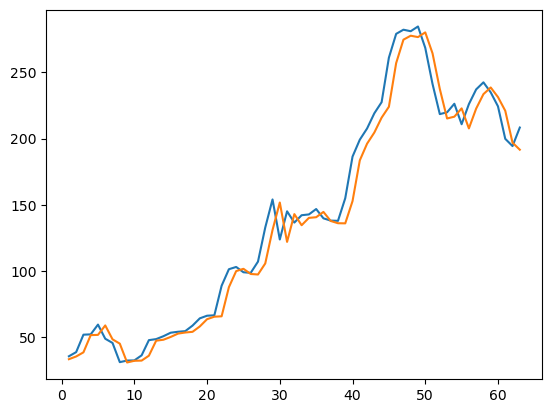

In [119]:
from sklearn.metrics import r2_score

X_test = X_test.drop(columns=['Tesla Stock Open Price','Tesla Stock Volume','Tesla Stock Adj Close Price','Tesla Stock High','Tesla Stock Low','S&P 500 Variance', 'Tesla Wikipedia Page Views','Nissan Stock Price','Sentiment','Ford Stock Price','GM Stock Price'])
X_test=sm.add_constant(X_test)
print(X_test.head())
y_pred = lrm.predict(X_test)

# Assuming y_test and y_pred are the actual and predicted values, respectively
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

osr2=OSR2(lrm, y_train, X_test, y_test)
print("OSR2 Score:", osr2)

mean_absolute_error = np.mean(np.abs(y_test - y_pred))
mean_absolute_error_percentage = mean_absolute_error / np.mean(y_test)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Error Percentage:", mean_absolute_error_percentage)

plt.plot(y_test)
plt.plot(y_pred)
plt.show()